In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'numpy'

In [ ]:

df = pd.read_csv("student_data.csv")

X = df.iloc[:, :-1].values 
Y = df.iloc[:, -1].values.reshape(-1, 1) 

df.head()

,StudyHours,SleepHours,Pass
0,2.5,6,0
1,5.1,8,1
2,3.2,5,0
3,8.5,8,1
4,1.5,4,0


In [5]:
X = X / np.max(X, axis=0) #normalization

In [6]:
epochs = 1000
learning_rate = 0.1

input_neurons = X.shape[1]
hidden_neurons = 3
output_neurons = 1

In [7]:

np.random.seed(42)

W1 = np.random.rand(input_neurons, hidden_neurons)
b1 = np.random.rand(1, hidden_neurons)

W2 = np.random.rand(hidden_neurons, output_neurons)
b2 = np.random.rand(1, output_neurons)


In [13]:
losses = []

for epoch in range(epochs):

    Z1 = np.dot(X, W1) + b1
    A1 = 1 / (1 + np.exp(-Z1))   # sigmoid

    Z2 = np.dot(A1, W2) + b2
    A2 = 1 / (1 + np.exp(-Z2))   # output

    # -------- Error --------
    error = Y - A2
    loss = np.mean(np.abs(error))
    losses.append(loss)

    # backpropogation
    dA2 = error * (A2 * (1 - A2))      # sigmoid derivative
    dW2 = np.dot(A1.T, dA2)
    db2 = np.sum(dA2, axis=0, keepdims=True)

    dA1 = np.dot(dA2, W2.T) * (A1 * (1 - A1))
    dW1 = np.dot(X.T, dA1)
    db1 = np.sum(dA1, axis=0, keepdims=True)

    W2 += learning_rate * dW2
    b2 += learning_rate * db2

    W1 += learning_rate * dW1
    b1 += learning_rate * db1

    if epoch % 100 == 0:
        print(f"Epoch {epoch} | Loss: {loss:.4f}")




Epoch 0 | Loss: 0.0507
Epoch 100 | Loss: 0.0466
Epoch 200 | Loss: 0.0432
Epoch 300 | Loss: 0.0402
Epoch 400 | Loss: 0.0377
Epoch 500 | Loss: 0.0355
Epoch 600 | Loss: 0.0336
Epoch 700 | Loss: 0.0319
Epoch 800 | Loss: 0.0304
Epoch 900 | Loss: 0.0290


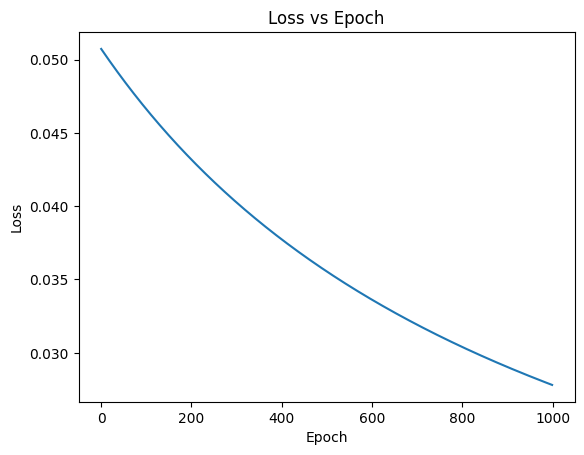

In [ ]:
plt.figure()
plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss vs Epoch")
plt.show()

In [16]:
study_hours = float(input("Enter Study Hours: "))
sleep_hours = float(input("Enter Sleep Hours: "))

new_X = np.array([[study_hours, sleep_hours]])
new_X = new_X / np.max(X, axis=0)

Z1_new = np.dot(new_X, W1) + b1
A1_new = 1 / (1 + np.exp(-Z1_new))

Z2_new = np.dot(A1_new, W2) + b2
A2_new = 1 / (1 + np.exp(-Z2_new))

print("\nPrediction Probability:", round(A2_new[0][0], 4))

if A2_new >= 0.5:
    print("Prediction: PASS")
else:
    print("Prediction: FAIL")


Prediction Probability: 1.0
Prediction: PASS
